# Spot-checking inicial: KNN

## Carregamento dos Dados

In [1]:
import pandas as pd

In [2]:
df_sinan_processed = pd.read_csv("../data/processed/final.csv")

In [3]:
df_sinan_processed

,idade_paciente,possui_doenca_autoimune,possui_diabetes,possui_doencas_hematologicas,possui_hepatopatias,possui_doenca_renal,possui_hipertensao,possui_doenca_acido_peptica,apresenta_febre,apresenta_cefaleia,...,one_hot_raca_cor_paciente_4,one_hot_raca_cor_paciente_5,one_hot_raca_cor_paciente_9,one_hot_gestante_paciente_1,one_hot_gestante_paciente_2,one_hot_gestante_paciente_3,one_hot_gestante_paciente_4,one_hot_gestante_paciente_5,one_hot_gestante_paciente_6,one_hot_gestante_paciente_9
0,2.701815,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1.086573,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1.036096,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.680099,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.427718,0,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221607,-0.276289,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1221608,0.834191,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1221609,-0.427718,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1221610,-0.225812,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [4]:
# Matriz de atributos
X = df_sinan_processed.drop("severity", axis=1)

# Vetor alvo
y = df_sinan_processed["severity"]

feature_names = X.columns.tolist()
target_names = ["low_risk", "alarm", "severe"]

In [13]:
print(feature_names)

['idade_paciente', 'possui_doenca_autoimune', 'possui_diabetes', 'possui_doencas_hematologicas', 'possui_hepatopatias', 'possui_doenca_renal', 'possui_hipertensao', 'possui_doenca_acido_peptica', 'apresenta_febre', 'apresenta_cefaleia', 'apresenta_exantema', 'apresenta_dor_costas', 'apresenta_mialgia', 'apresenta_vomito', 'apresenta_conjutivite', 'apresenta_dor_retroorbital', 'apresenta_artralgia', 'apresenta_artrite', 'apresenta_leucopenia', 'apresenta_petequias', 'dias_sintomas_notificacao', 'one_hot_sigla_uf_residencia_CO', 'one_hot_sigla_uf_residencia_N', 'one_hot_sigla_uf_residencia_NE', 'one_hot_sigla_uf_residencia_S', 'one_hot_sigla_uf_residencia_SE', 'one_hot_sexo_paciente_F', 'one_hot_sexo_paciente_M', 'one_hot_raca_cor_paciente_1', 'one_hot_raca_cor_paciente_2', 'one_hot_raca_cor_paciente_3', 'one_hot_raca_cor_paciente_4', 'one_hot_raca_cor_paciente_5', 'one_hot_raca_cor_paciente_9', 'one_hot_gestante_paciente_1', 'one_hot_gestante_paciente_2', 'one_hot_gestante_paciente_3', 

In [ ]:
print(X.dtypes)

idade_paciente                    float64
possui_doenca_autoimune             int64
possui_diabetes                     int64
possui_doencas_hematologicas        int64
possui_hepatopatias                 int64
possui_doenca_renal                 int64
possui_hipertensao                  int64
possui_doenca_acido_peptica         int64
apresenta_febre                     int64
apresenta_cefaleia                  int64
apresenta_exantema                  int64
apresenta_dor_costas                int64
apresenta_mialgia                   int64
apresenta_vomito                    int64
apresenta_conjutivite               int64
apresenta_dor_retroorbital          int64
apresenta_artralgia                 int64
apresenta_artrite                   int64
apresenta_leucopenia                int64
apresenta_petequias                 int64
dias_sintomas_notificacao         float64
one_hot_sigla_uf_residencia_CO      int64
one_hot_sigla_uf_residencia_N       int64
one_hot_sigla_uf_residencia_NE    

In [5]:
# Contar exemplos por classe
from collections import Counter 

class_counts = Counter(y)
for cls, count in class_counts.items():
    print(f"Número de exemplos na classe '{cls}': {count}")

Número de exemplos na classe 'severe': 5788
Número de exemplos na classe 'alarm': 48604
Número de exemplos na classe 'low_risk': 1167220


--- Matriz de Confusão ---


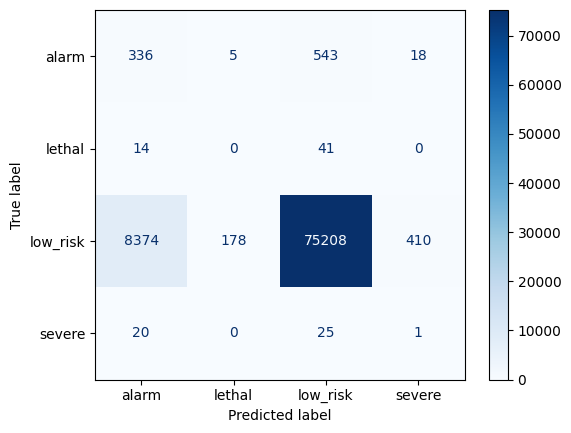


--- Relatório de Classificação ---
              precision    recall  f1-score   support

       alarm       0.04      0.37      0.07       902
      lethal       0.00      0.00      0.00        55
    low_risk       0.99      0.89      0.94     84170
      severe       0.00      0.02      0.00        46

    accuracy                           0.89     85173
   macro avg       0.26      0.32      0.25     85173
weighted avg       0.98      0.89      0.93     85173



In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Separar o conjunto de teste ESTRATIFICADO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. Configurar Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Testar diferentes valores de K
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
cv_scores = []

print("--- Validação Cruzada para diferentes valores de K ---")
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    # Realizar validação cruzada estratificada
    scores = cross_val_score(knn_model, X_train, y_train, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    print(f"K={k}: Acurácia média = {scores.mean():.4f} (+/- {scores.std():.4f})")

# 4. Encontrar o melhor K
best_k = k_values[np.argmax(cv_scores)]
print(f"\n--- Melhor K: {best_k} ---")

# 5. Treinar modelo final com o melhor K
knn_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_model.fit(X_train, y_train)

# 6. Avaliar no conjunto de teste
y_pred = knn_model.predict(X_test)

# 7. Analisar os resultados
print("\n--- Matriz de Confusão ---")
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=target_names,
    cmap=plt.cm.Blues
)
plt.title(f'Matriz de Confusão - KNN (K={best_k})')
plt.show()

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred, target_names=target_names))

# 8. Plotar a variação da acurácia com diferentes valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('Acurácia do KNN vs Valor de K (Stratified K-Fold CV)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia Média (CV)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Observando o Efeito do K

As árvores de decisão treinadas nos itens anteriores não possuíam nenhuma forma de poda. No entanto, é possível utilizar técnicas de poda através do scikit-learn. Como consequência, elas podem ter uma complexidade além do que é necessário na modelagem do problema.



O código abaixo gera árvores de decisão com diferentes profundidades máximas e as avalia em termos de acurácia.

Observe que todas as árvores são treinadas e avaliadas com os mesmos conjuntos de treino, validação e teste, visto que especificamos o parâmetro $random\_state = 42$.

**Não mude o valor que está sendo passado em random_state**.


In [9]:
## Definindo as proporções de treino, validação e teste.
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

### Teste

In [10]:
## Fazendo a primeira divisão, para separar um conjunto de teste dos demais.
## Assuma X_temp e y_temp para os dados de treinamento+validação e X_test e y_test para os de teste
## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_ratio,random_state=42,stratify=y)

### Treino e Validação

In [ ]:
## Fazendo a segunda divisão, para gerar o conjunto de treino e validação a partir
## do conjunto de 'treinamento' da divisão anterior
## Assuma X_train e y_train para os dados de treinamento e X_valid e y_valid para os de teste
## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_ratio/(train_ratio+test_ratio),random_state=42,stratify=y_temp)

In [12]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None]  # None faz com que essa poda não seja aplicada
accuracies_valid = []
accuracies_train = []

for depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
  dt.fit(X_train_resampled, y_train_resampled) # Usando os dados balanceados com SMOTE

  y_pred = dt.predict(X_valid)
  acc = accuracy_score(y_valid, y_pred)
  accuracies_valid.append(acc)
  accuracies_train.append(dt.score(X_train, y_train)) ##para analisar overfitting

NameError: name 'X_train_resampled' is not defined

In [40]:
accuracies_valid

[0.3874608641202254,
 0.39514715090795244,
 0.570742016280526,
 0.5426424546023795,
 0.5680964308077645,
 0.5681120851596744,
 0.6330463368816531,
 0.61203819661866,
 0.6776299311208516,
 0.659439574201628,
 0.6974796493425173,
 0.6851127113337507,
 0.9569661865998748]

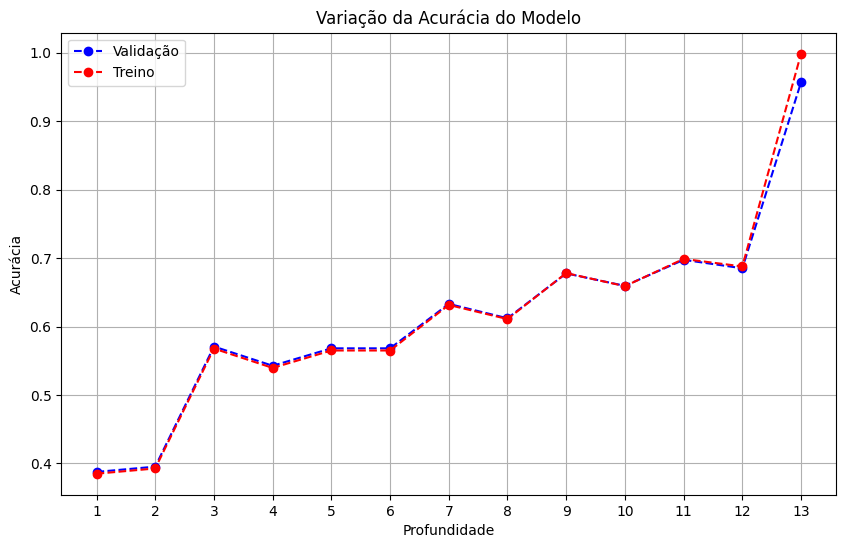

In [41]:
# Plotar a variação das acurácias
plt.figure(figsize=(10,6))
plt.plot(range(1, len(max_depths)+1),  accuracies_valid, marker='o', linestyle='--', color='b', label='Validação')
plt.plot(range(1, len(max_depths)+1), accuracies_train, marker='o', linestyle='--', color='r', label='Treino')
plt.title('Variação da Acurácia do Modelo')
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.xticks(range(1, len(max_depths)+1))
plt.legend()
plt.grid(True)
plt.show()

Para avaliarmos o desempenho do modelo otimizado em novos dados, devemos repetir o treinamento selecionando o melhor valor de hiperparâmetro(s) com base no gráfico anterior, e fazer a avaliação nos dados de teste.
Para melhorar a capacidade de estimar o desempenho do modelo, podemos treinar com os dados de treinamento e validação, tendo em vista que ambos são independentes do conjunto de teste (dados nunca vistos).


In [ ]:
best_max_depth = 13 ## preencha aqui com o melhor valor do hiperparâmetros, conforme análise anterior

In [51]:
# concatena dados de treino e validação, para treinar modelo a ser avaliado com dados de teste
X_train2 = np.concatenate((X_train, X_valid), axis=0)
y_train2 = np.concatenate((y_train, y_valid), axis=0)

In [52]:
print("Distribuição original do treino+validação:", Counter(y_train2))

Distribuição original do treino+validação: Counter({'low_risk': 357718, 'alarm': 3833, 'lethal': 235, 'severe': 196})


In [53]:
smote_final = SMOTE(random_state=42)
X_train_final, y_train_final = smote_final.fit_resample(X_train2, y_train2)

In [54]:
print("Distribuição após SMOTE final:", Counter(y_train_final))

Distribuição após SMOTE final: Counter({'low_risk': 357718, 'lethal': 357718, 'alarm': 357718, 'severe': 357718})


In [49]:
# treina e avalia a árvore de decisão com valor otimizado de max_depth
dt = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
dt.fit(X_train_final, y_train_final)

y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

/home/max/ML/TrabalhoPraticoML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.8051189730745147

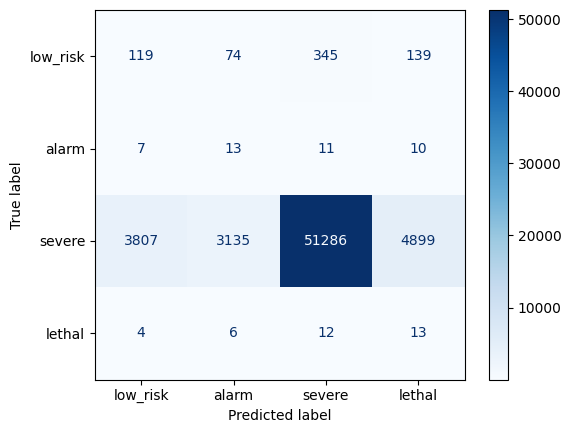

In [50]:
# Plota a matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names, cmap=plt.cm.Blues)